# Desarrollo PCA analysis

Autor: FFJP

In [1]:
#Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
import os
import janitor

os.getcwd()

'/Users/fabianjp/Documents/Work/ASIES/Desarrollo local/Github/R/Desarrollo_local/Scripts'

## Get and pre process data

In [54]:
#Data
fundesa_file = r'/Users/fabianjp/Documents/Work/ASIES/Desarrollo local/Github/R/Desarrollo_local/Data/datos_fundesa.csv'
raw_data = pd.read_csv(fundesa_file, encoding='latin1')
raw_data = raw_data.clean_names()
print(raw_data.columns)


Index(['cod_depto', 'departamento', 'cod_mupio', 'municipio',
       'extorsiones_por_100_000_habitantes',
       'homicidios_por_100_000_habitantes', 'faltas_por_100_000_habitantes',
       'casos_por_conflictividad', 'ranking_gestion_municipal', 'pdm_ot',
       'brecha_de_la_red_vial_', 'distancia_promedio_a_aeropuertos',
       'distancia_promedio_a_puertos', 'tasa_de_electrificacion_',
       'cobertura_de_agua_y_saneamiento', 'deficit_de_vivienda',
       'radiobases_de_telefonia_celular_por_km2', 'usuarios_de_internet',
       'tasa_de_inflacion', 'pobreza', 'gini', 'gasto_en_salud_publica',
       'tasa_de_desnutricion_cronica', 'gasto_en_educacion', 'tasa_neta',
       'alumnos_por_docente', 'capacitacion_tecnica',
       'graduandos_mate_lectura', 'carga_tributaria', 'inversion_publica',
       'afiliacion_al_igss', 'afiliados_por_patrono_particular',
       'peso_del_gobierno_en_la_contratacion', 'salario_minimo',
       'ingreso_medio', 'deportados', 'km2_a_cargo_de_cada_ag

Create variables divide by population

Select variables that we will use

In [55]:
seguridad = ['extorsiones_por_100_000_habitantes','homicidios_por_100_000_habitantes', 'faltas_por_100_000_habitantes']
salud = ['afiliacion_al_igss', 'tasa_de_desnutricion_cronica']
instituciones = ['ranking_gestion_municipal', 'gasto_en_salud_publica', 'gasto_en_educacion', 'carga_tributaria', 'inversion_publica']
infraestructura = ['distancia_promedio_a_aeropuertos', 'distancia_promedio_a_puertos', 'tasa_de_electrificacion_',
                   'cobertura_de_agua_y_saneamiento', 'deficit_de_vivienda','radiobases_de_telefonia_celular_por_km2', 'usuarios_de_internet', 
                   'densidad_poblacional'] #,'extension_territorial'] #'brecha_de_la_red_vial_', #extensino territorial es interesante pero es un rank
macroeconomia = ['pobreza', 'ingreso_medio', 'pib_per_capita'] #'pib_local','tasa_de_inflacion'
capital_humano = ['tasa_neta','alumnos_por_docente', 'capacitacion_tecnica', 'graduandos_mate_lectura']
sectores = ['fuerza_laboral_sector_servicios_', 'agricultura']#,'salario_minimo','peso_del_gobierno_en_la_contratacion']
migracion = ['deportados', 'remesas', 'migra_vida_pout']
financiero = ['depositos', 'cartera_de_creditos']
emprendimiento = ['costo_iniciar_un_negocio_']
demos = ['ladinos_porcentaje', 'establecimientos_turisticos', 'turismo_pp','tasa_global_de_participacion']#, 'tasa_global_de_participacion_indigena',
       #'tasa_global_de_participacion_mujeres', 'educ', 'indigena_educ', 'mujeres_educ_mean'] 

#skiped tiempo de iniciar un negocio y bancarios because they were equal in all municipios

icl_agregados = ['instituciones', 'infraestructura', 'adopcion_de_tics', 'entorno_economico', 'salud', 'fuerza_laboral_y_talento',
                 'inversion_productiva', 'mercado_laboral', 'sistema_financiero','tamano_del_mercado', 'dinamismo_de_los_negocios', 'capacidad_de_innovacion']
sofi = ['wes_score_mean']
development_vars = seguridad + instituciones + infraestructura
development_vars = icl_agregados 
#development_vars = icl_agregados + sofi
development_vars = seguridad + salud + instituciones + infraestructura + macroeconomia + capital_humano + sectores +migracion + financiero + emprendimiento +demos
development_vars = icl_agregados 


data_pd = raw_data[development_vars]

data_pd

,instituciones,infraestructura,adopcion_de_tics,entorno_economico,salud,fuerza_laboral_y_talento,inversion_productiva,mercado_laboral,sistema_financiero,tamano_del_mercado,dinamismo_de_los_negocios,capacidad_de_innovacion
0,69.329933,83.316112,92.521270,82.754538,100.000000,69.047151,48.138724,82.845554,83.589875,72.408772,97.962154,100
1,58.902298,80.534437,97.416648,84.559296,51.240588,54.709094,98.548473,75.300888,88.853333,45.636783,71.924389,0
2,52.396234,81.051956,50.624164,74.620446,51.193072,53.034175,83.256068,72.024004,98.516430,38.782250,66.097996,0
3,64.992051,81.455511,35.716515,70.670674,60.162501,58.594952,100.000000,69.575066,98.516430,16.797205,62.405612,0
4,69.633073,75.683740,33.296367,58.577999,51.647056,46.413569,95.761306,69.065009,98.516430,18.203084,62.005412,0
...,...,...,...,...,...,...,...,...,...,...,...,...
335,73.507409,58.764530,10.625571,58.501435,30.987403,28.896430,48.110043,46.918559,91.165224,27.388247,46.119428,0
336,67.927743,63.023809,17.075624,65.078568,46.477522,38.608369,43.731812,46.341246,81.732825,26.530971,57.115725,0
337,78.140154,63.543183,13.860381,65.083731,52.463398,45.080520,54.631078,48.654240,78.792251,39.087604,60.486054,0
338,63.295949,72.077231,42.964444,73.251478,53.919795,41.346269,56.691019,46.593880,85.279322,26.379598,54.274490,0


In [53]:
development_vars = seguridad + salud + instituciones + infraestructura + macroeconomia + capital_humano + sectores +migracion + financiero + emprendimiento +demos
len(development_vars)

37

Check for missing values

In [56]:
print(data_pd.isna().sum().sort_values(ascending=False))
data_pd = data_pd.dropna(axis=1)
data = data_pd.values  # Convert to a NumPy array and filter
development_vars = data_pd.columns

instituciones                0
infraestructura              0
adopcion_de_tics             0
entorno_economico            0
salud                        0
fuerza_laboral_y_talento     0
inversion_productiva         0
mercado_laboral              0
sistema_financiero           0
tamano_del_mercado           0
dinamismo_de_los_negocios    0
capacidad_de_innovacion      0
dtype: int64


### Visualizations

View patterns in variables

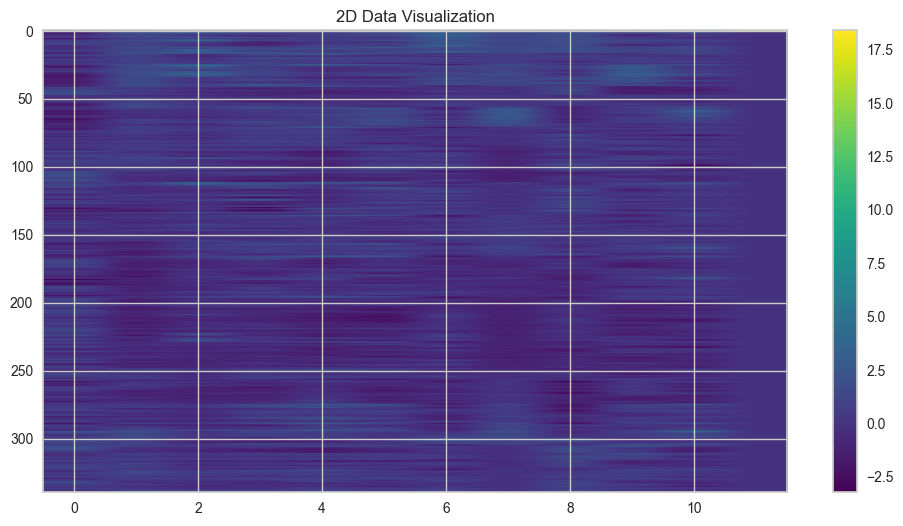

In [57]:
zDatap = stats.zscore(data)


plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Display the data as an image
plt.imshow(zDatap, cmap='viridis', aspect='auto')
#plt.imshow(data, cmap='viridis', aspect='auto')
plt.colorbar()  # Add a color bar to show the color scale
plt.title('2D Data Visualization')
plt.show()

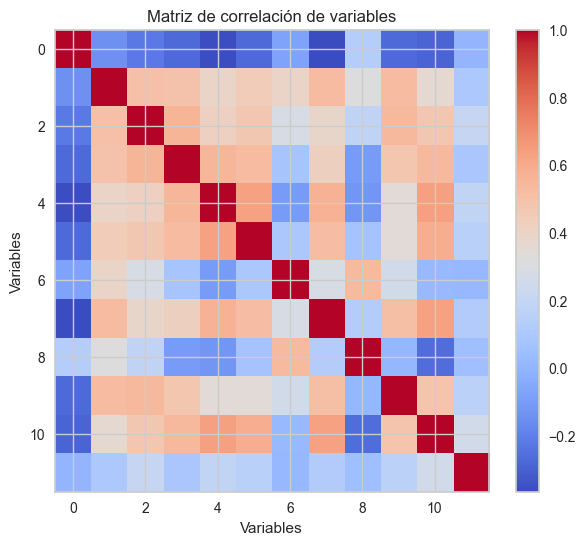

In [59]:
plt.figure(figsize=(7, 6))  # Adjust the width and height as needed
#r = np.corrcoef(zDatap, rowvar=False)  # Variables are columnwise
r = np.corrcoef(data, rowvar=False)  # Variables are columnwise

# Plot the correlation matrix
plt.imshow(r, cmap='coolwarm', aspect='auto')  # Using 'coolwarm' colormap
plt.colorbar()  # Add color bar to show the correlation scale
plt.title('Matriz de correlación de variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [60]:
data_pd.iloc[:,28:34].head(10)
#data[0:10:,28:34]

""
0
1
2
3
4
5
6
7
8
9


## PCA analysis

Run the PCA

In [61]:
# The PCA expects normally distributed DATA
# So that is why we z-score the data first
# 1. Z-score the data:
zDatap = stats.zscore(data)
# 2. Run the PCA:
pcap = PCA().fit(zDatap)
# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pcap.explained_variance_

# 3b. Loadings (eigenvectors): Weights per factor in terms of the original data. Where do the
# principal components point, in terms of the 54 questions?
loadings = pcap.components_

# 3c. Rotated Data: Simply the transformed data - we had 360 municipios (rows) in
# terms of x variables (columns), now we have 360 particpants in terms of x
# factors ordered by decreasing eigenvalue
rotatedData = pcap.fit_transform(zDatap)

# 4. For the purposes of this, you can think of eigenvalues in terms of 
# (co)variance explained:
covarExplained = eigVals/sum(eigVals)*100

Determine the number of factors (principal components) to interpret

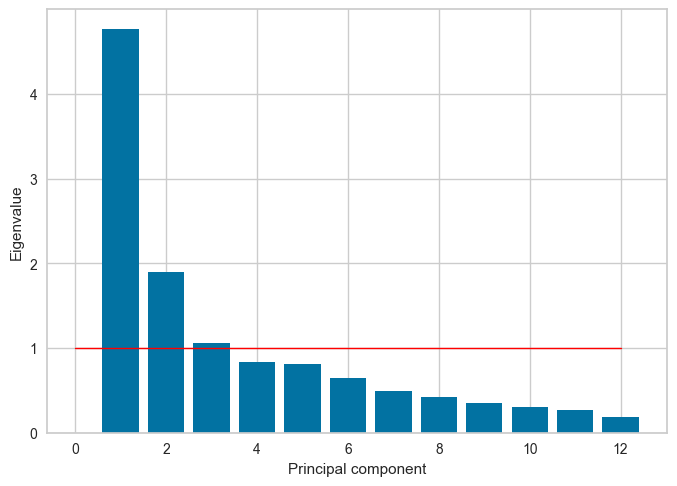

In [62]:
acumvar = np.cumsum(covarExplained)
# What a scree plot is: Plotting a bar graph of the sorted Eigenvalues
numClasses = len(data[0,:])
plt.bar(np.linspace(1,numClasses,numClasses),eigVals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,numClasses],[1,1],color='red',linewidth=1)# Kaiser criterion line
plt.show()

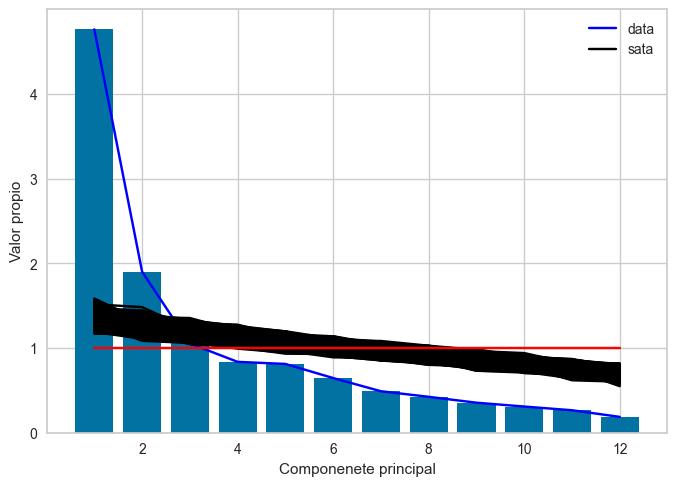

In [65]:
#%% 6 Horn's parallel method (Horn, 1965) as described on page 239ff of the NDS book

# Initialize variables:
nDraws = 10000 # How many repetitions per resampling?
numRows = len(data) #968 How many rows to recreate the dimensionality of the original data?
numColumns = len(data[0,:]) #54 How many columns to recreate the dimensionality of the original data?
eigSata = np.empty([nDraws,numColumns]) # Initialize array to keep eigenvalues of sata
eigSata[:] = np.NaN # Convert to NaN

for i in range(nDraws):
    # Draw the sata from a normal distribution:
    sata = np.random.normal(0,1,[numRows,numColumns]) 
    # Run the PCA on the sata:
    pca = PCA()
    pca.fit(sata)
    # Keep the eigenvalues:
    temp = pca.explained_variance_
    eigSata[i] = temp

# After 10,000 times we get 10,000 random pca's each with x eigen values

# Make a plot of that and superimpose the real data on top of the sata:
plt.bar(np.linspace(1,numClasses,numClasses),eigVals)
plt.plot(np.linspace(1,numColumns,numColumns),eigVals,color='blue') # plot eigVals from section 4
plt.plot(np.linspace(1,numColumns,numColumns),np.transpose(eigSata),color='black') # plot eigSata
plt.plot([1,numColumns],[1,1],color='red') # Kaiser criterion line
plt.xlabel('Componenete principal')
plt.ylabel('Valor propio')
plt.legend(['data','sata'])
plt.show()

# By this method, only the first x factors exceed the noise
# distribution.

In [64]:
#Ooptimal nuber of factors
optimal_factors = 2
print('Covariance explained by the ' + str(optimal_factors) + ' principal factors:', sum(covarExplained[:optimal_factors]))

Covariance explained by the 2 principal factors: 55.34083941878716


In [707]:
covarExplained[:7]

array([29.03937676,  9.94432296,  7.97894619,  7.03749348,  5.89682497,
        4.98197653,  3.13928244])

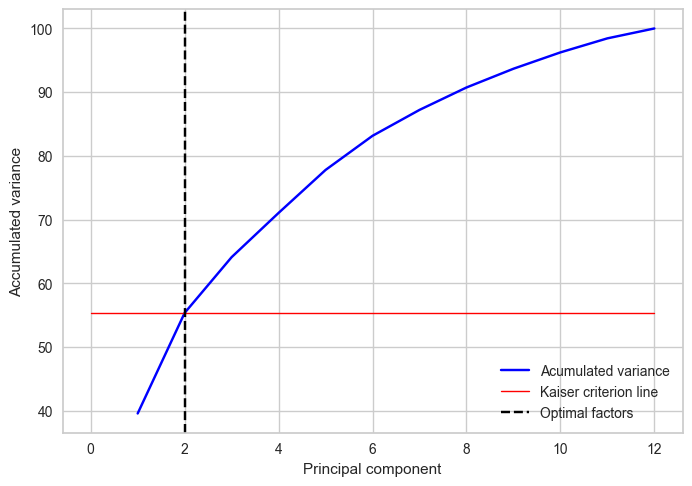

In [66]:
var = np.sum(covarExplained[0:2])
var
#Variance plot
plt.plot(np.linspace(1,numClasses,numClasses), acumvar, color = 'blue', label = 'Acumulated variance') #Acumulated variance
plt.xlabel('Componenete principal')
plt.ylabel('Varianza acumulada')
plt.plot([0,numClasses],[var,var],color='red',linewidth=1, label = 'Kaiser criterion line')# Kaiser criterion line
plt.axvline(optimal_factors, color='black', linestyle='--', label='Optimal factors')
plt.legend()
plt.show()

## Interpreting the factors

In [13]:
#7 Interpreting the factors 
# Now that we realize that 1to 8 are reasonable solutions to the personality questions
# we have to interpret the factors.
# This is perhaps where researchers have the most leeway.
# You do this - in principle - by looking at the loadings - in which
# direction does the factor point? 

#Because the sum of the squares of all loadings for an individual principal component 
#must sum to one, we can calculate what the loadings would be if all variables contributed 
#equally to that principal component. Any variable that has a larger loading than this value 
#contributes more than one variable’s worth of information and would be regarded as an 
#important contributor to that principal component.
#54*(loadings[i]**2)=1 loadings[i] = ± 0.13608276348795434
tres = (1/len(loadings[0,:]))**0.5


#whichPrincipalComponent = 1 # Try a few possibilities (at least 1,2,3 - or 0,1,2 that is - indexing from 0)

# 1: The first one accounts for almost everything, so it will probably point 
# in all directions at once
# 2: Challenging/informative - how much information?
# 3: Organization/clarity: Pointing to 6 and 5, and away from 16 - structure?

def loadingplot(loadings, data, factors, threshold, names = [None]*1000):
    totalfactors = len(data[0,:])
    for ii in range(factors):
        plt.bar(np.linspace(1,totalfactors,totalfactors),loadings[ii,:])
        plt.xlabel('Question')
        plt.ylabel('Loading')
        plt.title('Factor {:.0f}: '.format(ii+1) + names[ii])
        plt.plot([1,totalfactors],[threshold,threshold],color='red')
        plt.plot([1,totalfactors],[-threshold,-threshold],color='red')
        plt.show()

#loadingplot(loadings, data, optimal_factors,tres, ['','','','','','','',''])

In [67]:
factor_names = None

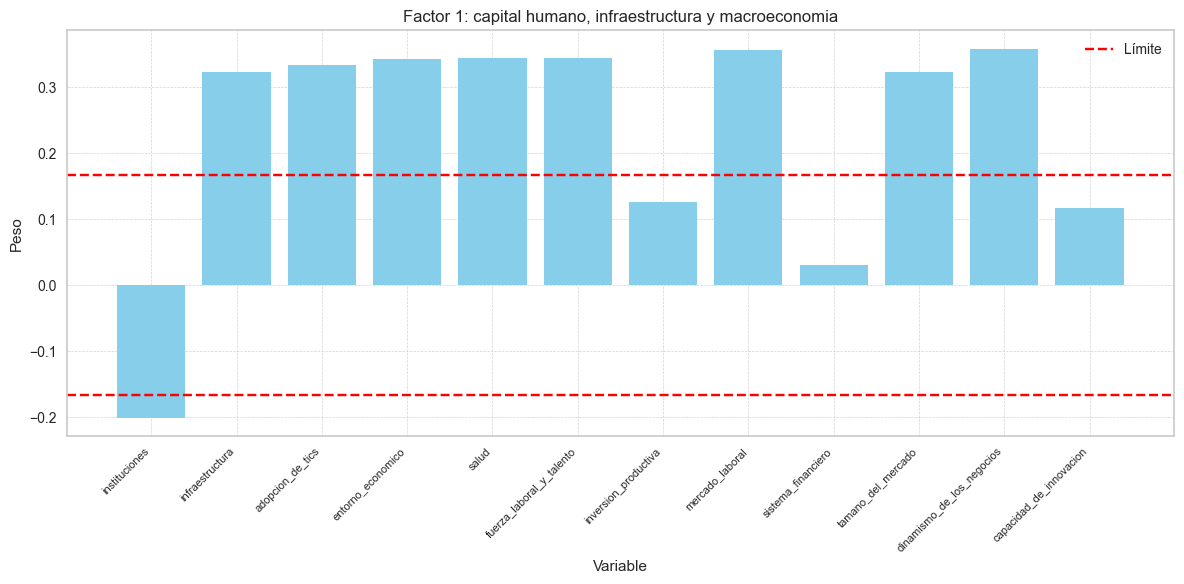

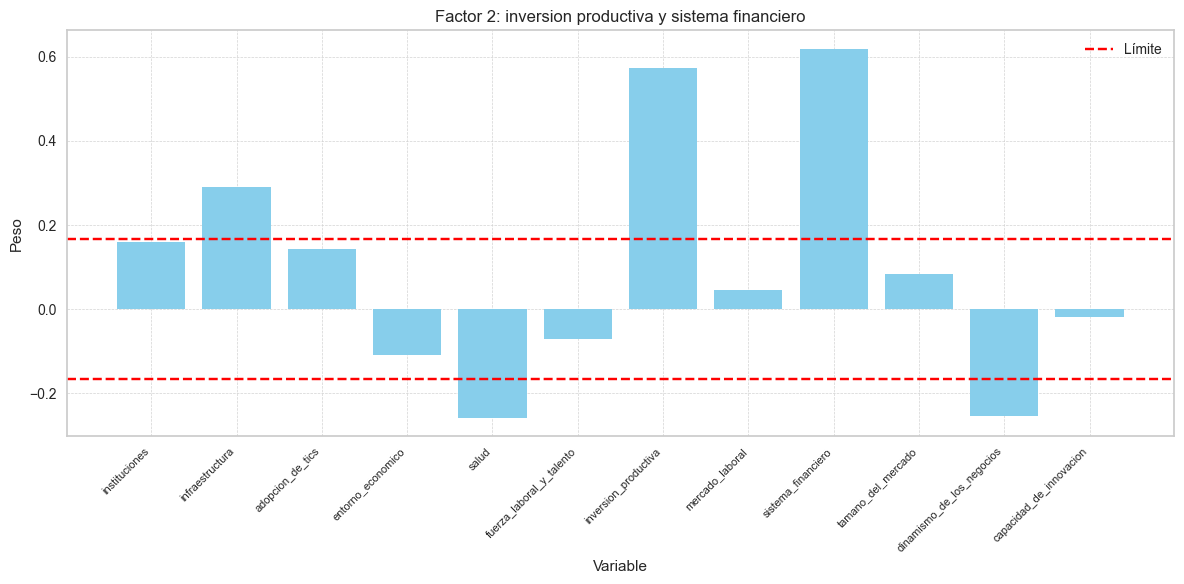

In [71]:
factor_run = 'all_variables_1'
factor_run = 'fundesa_aggregates_1'
#factor_run = 'all_variables_2'
#factor_run = 'no_factors_only_cluster'


def loadingplot(loadings, data, factors, threshold, names=None, question_labels=None, run = None):
    """
    Plots the loadings for a specified number of factors with variable names on the x-axis.

    Parameters:
    - loadings: 2D array-like, shape (factors, variables)
        Factor loadings for each factor.
    - data: 2D array-like
        The data used to calculate the factor loadings.
    - factors: int
        Number of factors to plot.
    - names: list, optional
        Names for each factor (length should be at least `factors`).
    - question_labels: list, optional
        Labels for each question (length should match the number of variables).
    - threshold: float, optional
        Threshold for marking loadings on the plot (default is 0.2).
    """
    output_folder = r'/Users/fabianjp/Documents/Work/ASIES/Desarrollo local/Github/R/Desarrollo_local/Data/factors' + r'/' + run
    # Check if the folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    totalfactors = loadings.shape[1]  # Number of variables (columns) in loadings
    if names is None:
        names = ['Factor {}'.format(i + 1) for i in range(factors)]
    
    if question_labels is None:
        question_labels = [f'Question {i + 1}' for i in range(totalfactors)]

    for ii in range(factors):
        plt.figure(figsize=(12, 6))  # Set the figure size for each plot
        plt.bar(np.arange(1, totalfactors + 1), loadings[ii, :], color='skyblue')  # Bar plot
        plt.xlabel('Variable')
        plt.ylabel('Peso')
        plt.title('Factor {:.0f}: {}'.format(ii + 1, names[ii]))
        
        # Threshold lines
        plt.axhline(threshold, color='red', linestyle='--', label='Límite')
        plt.axhline(-threshold, color='red', linestyle='--')
        plt.legend()
        
        # Set x-ticks to question labels
        plt.xticks(np.arange(1, totalfactors + 1), question_labels, rotation=45, ha='right', fontsize=8)

        plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray', zorder=1)  # Lower zorder for the grid
        #plt.ylim(-1, 1)  # Set y-axis limits for better visualization
        plt.grid(axis='y', linestyle='--')  # Add gridlines for better readability
        plt.tight_layout()  # Adjust layout for better fit
        plot_filename = 'Factor {:.0f}: {}.png'.format(ii + 1, names[ii])
        plt.savefig(os.path.join(output_folder, plot_filename), dpi=300)
        plt.show()
        


loadingplot(loadings, data, optimal_factors, threshold=tres, names = factor_names,question_labels=development_vars, run=factor_run)

In [32]:
#ALL Variables run
factor_names = ['salud, desarrollo economico, seguridad, diversificacion de actividades, migracion, menos ladinos', 
                'participacion laboral alta, poca capcitacion, alto salari minimo',
                'inversion y acceso a aduanas, bajo gasto en educacion y salud, servicios financieros fuertes',
                'baja inversino publica, alto gasto en salud y educacion, baja infraestructura de servicios basicos',
                'ciudades, establecimientos turisticos, y alta tasa de ladinos',
                'educacion alta, baja tecnificacion, alta tasa de servicios basicos',
                'alta capcitacion y baja carga tributaria, tasa de inmigracion alta'
                ]
factor_names = ['','','','','','']

In [154]:
#FUNDESA RUN
factor_names = ['Capital humano, infraestructura y macroeconomía', 'Inversión productiva y sistema financiero']
#factor_names = ['','','','','','','']

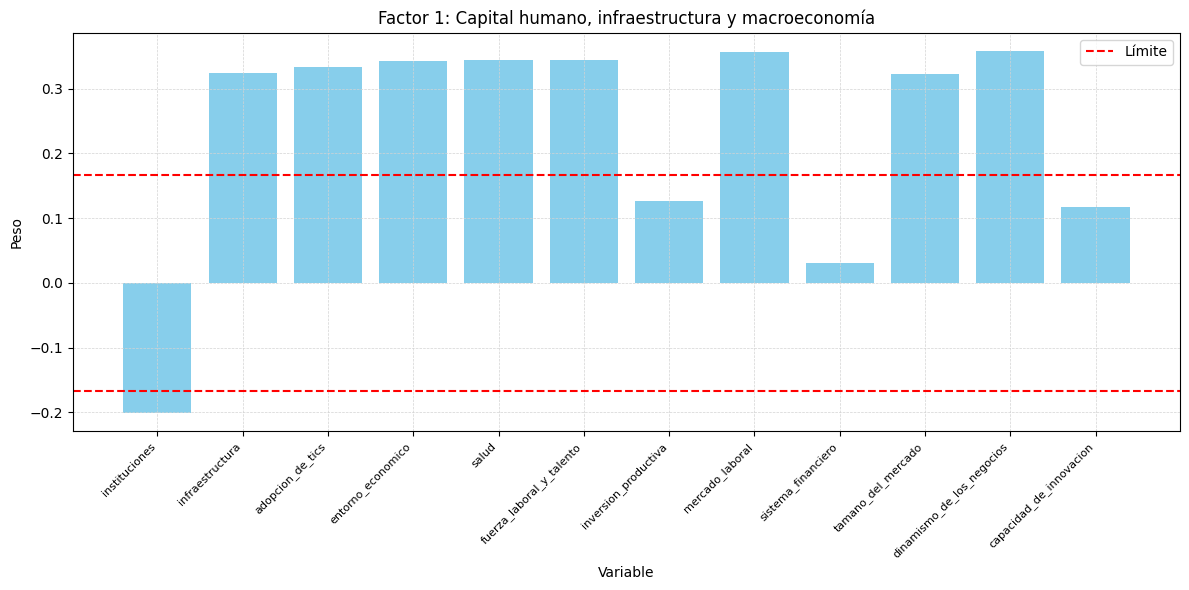

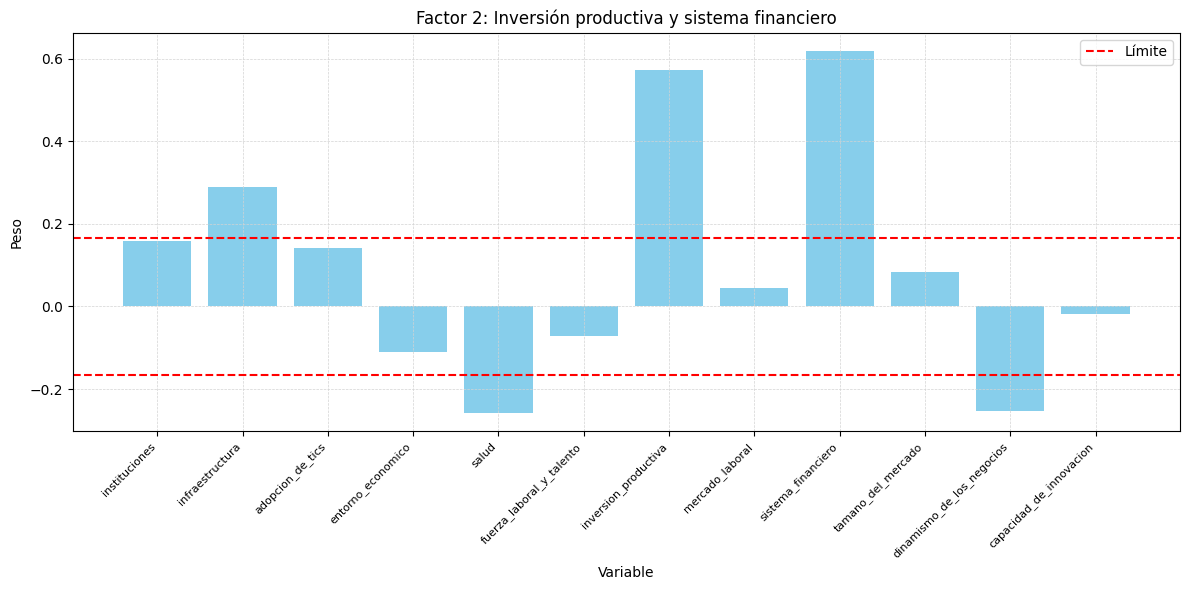

In [155]:
loadingplot(loadings, data, optimal_factors, threshold=tres, names = factor_names,question_labels=development_vars, run=factor_run)

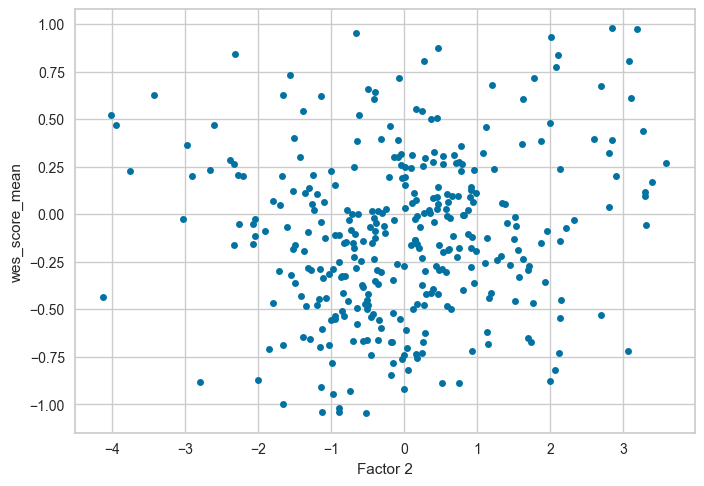

In [74]:
#Plot the data from columns 421-474 in the new coordinate system, where each dot 
#represents a person, and the axes represent the factors you found in 1). Hint: 
#If you identified more than 2 meaningful factors, it is a good idea to create 
#several 2D (X vs. Y) subplots for better interpretability.
factor_var = 2


#plt.plot(rotatedData[:,0]*-1,rotatedData[:,1]*-1,'o',markersize=5)
plt.plot(rotatedData[:,factor_var-1]*1,raw_data['wes_score_mean'].values,'o',markersize=5)
plt.xlabel('Factor {}'.format(factor_var))#factor_names[ 0])
plt.ylabel('wes_score_mean')
#plt.ylabel(factor_names[1])

def factorplot(rotatedData, factors, names = [None]*1000):
    for ii in range(factors):
        for jj in range(factors-ii-1):
            plt.plot(rotatedData[:,ii],rotatedData[:,ii+jj+1],'o',markersize=5)
            plt.xlabel(names[ii])
            plt.ylabel(names[ii+jj+1]) 
            plt.show()

#factorplot(rotatedData, 2, [])
            #plt.plot()
#factorplot(rotatedData, optimal_factors)

In [455]:
rotatedData.shape


(340, 12)

# Analisis de clusters

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer


In [77]:
#Fundesa
X = np.transpose(np.array([rotatedData[:,0], rotatedData[:,1]]))

#all others

#X = np.transpose(np.array([rotatedData[:,0], rotatedData[:,1],
#                           rotatedData[:,2], rotatedData[:,3],
#                           rotatedData[:,4], rotatedData[:,5]]))#,
#                           #rotatedData[:,6]]))#, rotatedData[:,7]]))
print(X.shape)

#No transformation
#X = zDatap

(340, 2)


In [ ]:
#data


2
3
4
5
6
7
8
9
10
11
12


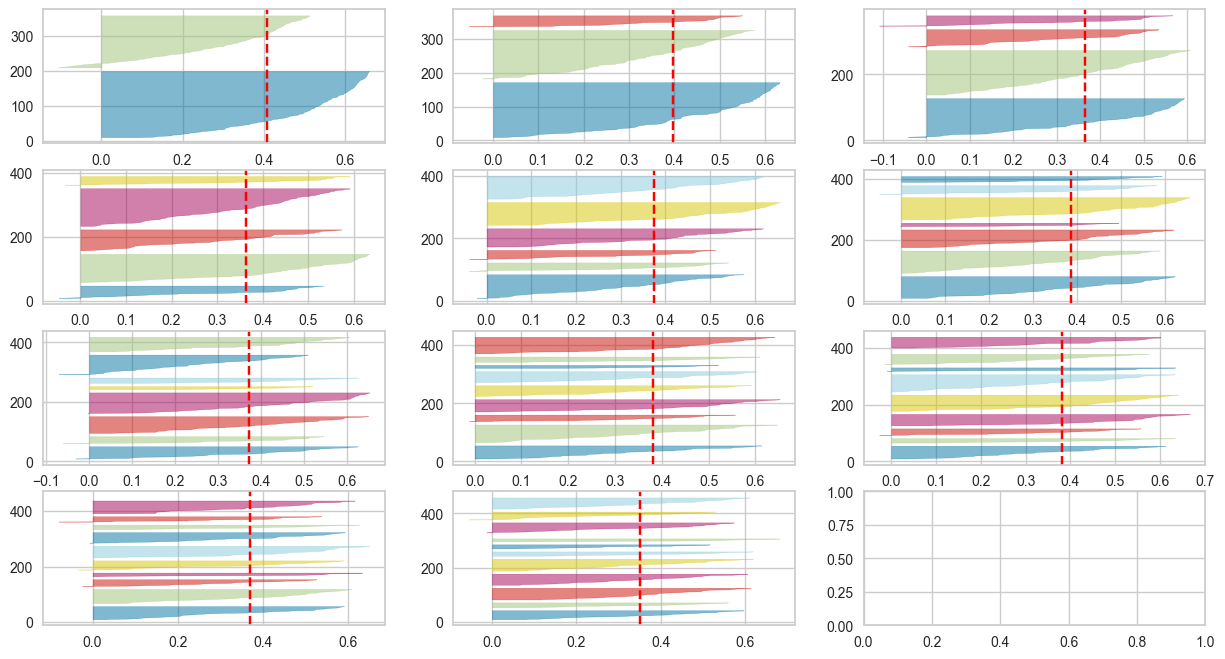

In [78]:
# Store our transformed data - the predictors - as X:


# Silhouette: How similar to points in cluster vs. others, arbitrariness

# Init:
numClusters = 11 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1]) # init container to store sums
Q[:] = np.NaN # convert to NaN
wcss = []  # Within-cluster sum of squares
silhouette_scores = []


fig, ax = plt.subplots(4, 3, figsize=(15,8))
# Compute kMeans:
for ii in range(2,numClusters + 2): # Loop through each cluster (from 2 to 10!)
    print(ii)
    kMeans = KMeans(n_clusters = int(ii), n_init=1000).fit(X) # compute kmeans
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(X,cId) # compute the mean silhouette coefficient of all samples
    # print(s.shape)
    Q[ii-2] = sum(s) # take sum
    q, mod = divmod(ii+1, 3)
    #print(divmod(ii, 3))
    wcss.append(kMeans.inertia_)

    visualizer = SilhouetteVisualizer(kMeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    silhouette_scores.append(visualizer.silhouette_score_)

    # Plot data:
    #plt.subplot(3,3,ii-1) 
#    plt.hist(s,bins=20) 
#    plt.xlim(-0.2,1)
#    plt.ylim(0,500)
#    plt.xlabel('Silhouette score')
#    plt.ylabel('Count')
#    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
#    plt.show()

In [123]:
from gap_statistic import OptimalK
import numpy as np

# Instantiate OptimalK with the max clusters
optimalK = OptimalK(parallel_backend='joblib')

# Compute optimal clusters and gap statistic
n_clusters = optimalK(X, cluster_array=np.arange(1, 11))
print("Optimal number of clusters:", n_clusters)


Optimal number of clusters: 1


In [79]:
silhouette_scores

[0.40705812801808616,
 0.39794682213934623,
 0.364020628698137,
 0.3635288949315128,
 0.37544722098495076,
 0.3859785382782483,
 0.37299323223036696,
 0.38141835111737404,
 0.3812144913971841,
 0.36949175873697226,
 0.35177931695008074]

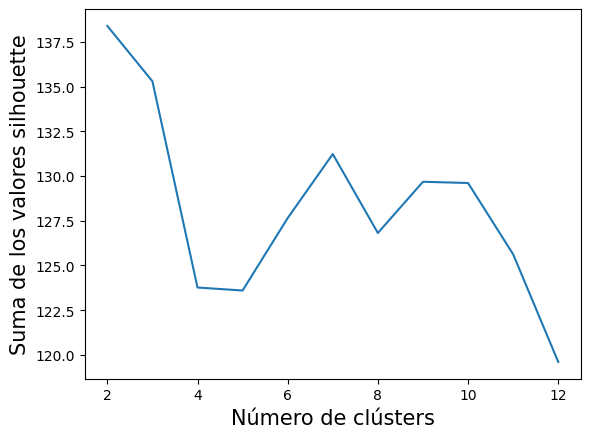

In [127]:
#%% Plot this to make it clearer what is going on
plt.plot(np.linspace(2,12,numClusters),Q)
plt.xlabel('Número de clústers', fontsize = 15)
plt.ylabel('Suma de los valores silhouette', fontsize = 15)
plt.show()
# kMeans gives you the center coordinates of the clusters, assuming a number
# of clusters. Silhouette gives you how many are most unamigously described
# by the clusters. Most likely "real" number: Where the sum of the
# silhouette scores peaks. In reality, they are complementary. Use together

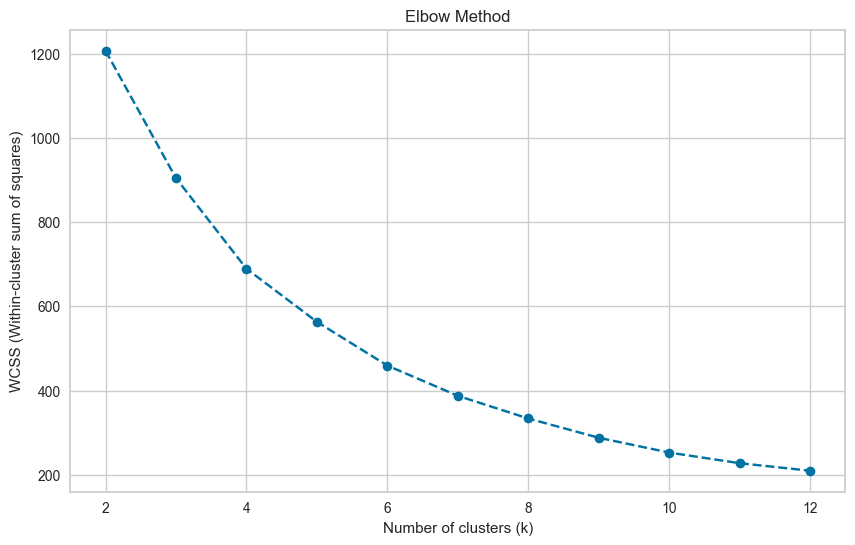

In [81]:
# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(2,12,numClusters), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

2 seems to be the optimal number of clusters

In [105]:
selected_clusters = 2
selected_clusters = 10 #FUNDESA

kMeans = KMeans(n_clusters = int(selected_clusters)).fit(X) # compute kmeans
cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
s = silhouette_samples(X,cId)


Graficas entre variabes independientes

In [87]:
indexVector
plt.rcdefaults()

/var/folders/9_/cw4fcnqx19j5csppmhlz4mzm0000gn/T/ipykernel_97690/2897066306.py:30: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



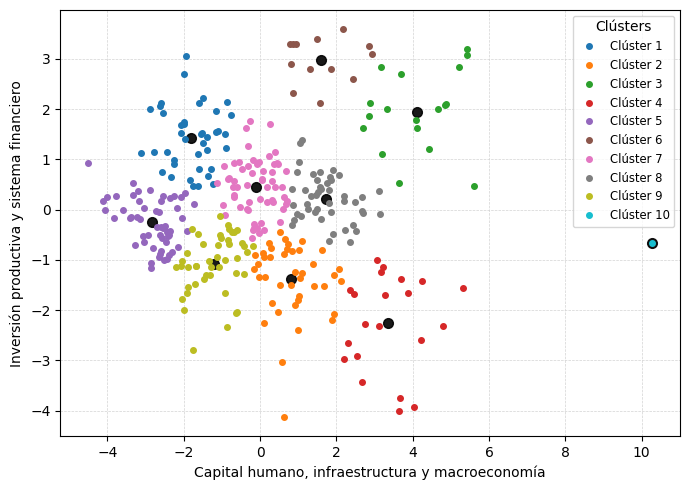

In [156]:
import numpy as np
import matplotlib.pyplot as plt

def plot_factors_subplots(rotatedData, cCoords, cId, factor_names, optimal_factors, highlight_cluster, run = None):
    """
    Plots pairwise scatter plots of the rotated data and cluster centers in a grid of subplots.

    Parameters:
    - rotatedData: 2D array-like, shape (samples, factors)
        The rotated data points.
    - cCoords: 2D array-like, shape (clusters, factors)
        The coordinates of the cluster centers.
    - cId: array-like
        Array of cluster IDs for each sample.
    - factor_names: list of str
        Names of the factors for labeling the axes.
    - optimal_factors: int
        Number of factors to plot.
    """
    output_folder = r'/Users/fabianjp/Documents/Work/ASIES/Desarrollo local/Github/R/Desarrollo_local/Data/factors' + r'/' + run
    # Check if the folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define the number of subplots (n x n grid)
    #fig, axes = plt.subplots(nrows=optimal_factors - 1, ncols=optimal_factors - 1, figsize=(15, 15))
    fig, axes = plt.subplots(nrows=optimal_factors - 1, ncols=optimal_factors - 1, figsize=(7, 5))

    plt.rcdefaults()
    cmap = cm.get_cmap('tab10', 10)  # 10 distinct colors for clusters 0 to 5

    
    indexVector = np.linspace(1, len(np.unique(cId)), len(np.unique(cId)))
    alphas = np.array([0.3] * len(np.unique(cId)))
    for cluster in highlight_cluster:
        alphas[cluster] = 1

    # Iterate through rows and columns of the subplot grid
    for jj in range(optimal_factors - 1):
        for gg in range(optimal_factors - jj - 1):
            if optimal_factors == 2:
                ax = axes
                size = 3
            else:
                ax = axes[jj, jj + gg]  # Select the corresponding subplot
                size = 3

            # Iterate over the clusters to plot data points
            for ii in indexVector:
                cluster_label = f"Clúster {int(ii)}"  # Label for each cluster
                plotIndex = np.argwhere(cId == int(ii - 1))
                ax.plot(cCoords[int(ii - 1), jj], cCoords[int(ii - 1), jj + gg + 1], 'o', markersize=4+size, color='black', alpha = 0.9)  
                ax.plot(rotatedData[plotIndex, jj], rotatedData[plotIndex, jj + 1 + gg], 'o', markersize=1+size, alpha = alphas[int(ii-1)], label=cluster_label)

            # Set labels for each subplot
            ax.set_xlabel(factor_names[jj])
            ax.set_ylabel(factor_names[jj + gg + 1])
            ax.legend(title="Clústers", loc="upper right", fontsize='small')


            # Add a grid for better readability
            ax.grid(True, linestyle='--', linewidth=0.5, color='lightgray')

    # Adjust layout to avoid overlap and improve spacing
    plt.tight_layout()
    plot_filename = 'Cross factors groups.png'.format()
    plt.savefig(os.path.join(output_folder, plot_filename), dpi=300)
    plt.show()

#plot_factors_subplots(rotatedData, cCoords, cId, factor_names, optimal_factors, [0,1,2], run=factor_run)
plot_factors_subplots(rotatedData, cCoords, cId, factor_names, optimal_factors, [0,1,2,3,4,5,6,7,8,9], run=factor_run)

#plot_factors_subplots(rotatedData, cCoords, cId, ['F1','F2','F3','F4','F5','F6'], optimal_factors, [0,1], run=factor_run)#all_2



In [ ]:
np.linspace(1, len(np.unique(cId)), len(np.unique(cId)))

array([1., 2., 3., 4., 5., 6.])

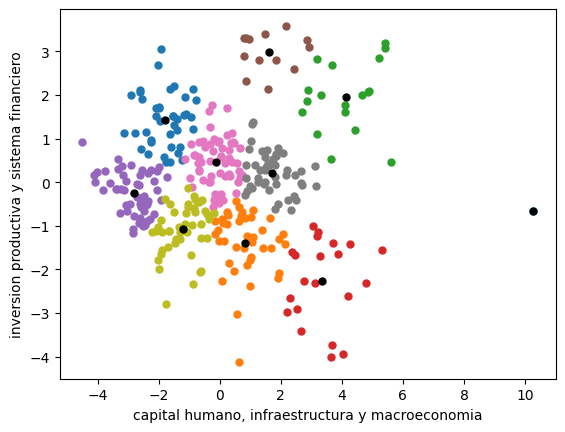

In [107]:
#%% Now let's plot and color code the data
indexVector = np.linspace(1,len(np.unique(cId)),len(np.unique(cId))) 
for jj in range(optimal_factors-1):
    for gg in range(optimal_factors-jj-1):
        for ii in indexVector:
            plotIndex = np.argwhere(cId == int(ii-1))
            plt.plot(rotatedData[plotIndex,jj],rotatedData[plotIndex,jj+1+gg],'o',markersize=+5)
            plt.plot(cCoords[int(ii-1),jj],cCoords[int(ii-1),jj+gg+1],'o',markersize=5,color='black')  
            plt.xlabel(factor_names[jj])#, fontsize = 15)
            plt.ylabel(factor_names[jj+gg+1])#, fontsize = 15)
            #plt.xticks(fontsize=10)
            #plt.yticks(fontsize=10)
        plt.show()

Graficas entre variables dependientes

0


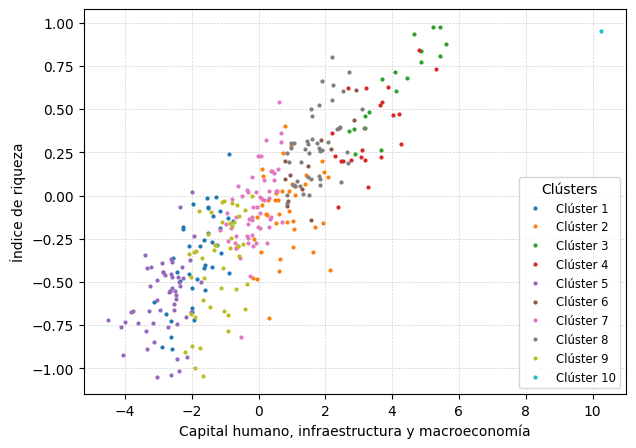

1


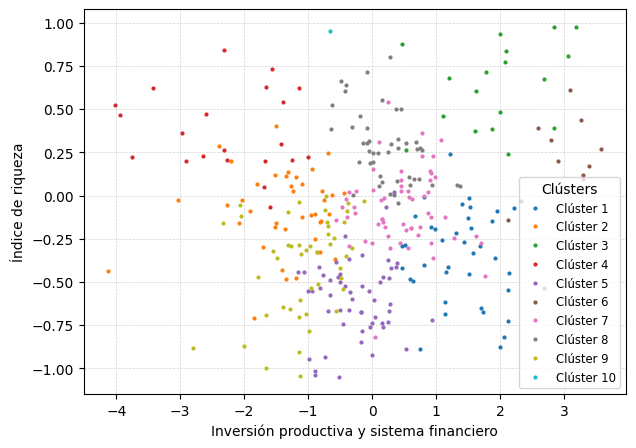

In [157]:
y_var = 'ladinos_porcentaje'
y_var = 'wes_score_mean'


#%% Now let's plot and color code the data
indexVector = np.linspace(1,len(np.unique(cId)),len(np.unique(cId))) 
for jj in range(1):
    for gg in range(optimal_factors-jj):
        plt.figure(figsize=(7, 5))
        print(gg)
        for ii in indexVector:
            cluster_label = f"Clúster {int(ii)}"  # Label for each cluster
            plotIndex = np.argwhere(cId == int(ii-1))
            plt.plot(rotatedData[plotIndex,gg],raw_data[y_var].values[plotIndex],'o',markersize=2, label = cluster_label)
            #plt.plot(cCoords[int(ii-1),jj],cCoords[int(ii-1),jj+gg+1],'o',markersize=5,color='black')  
            plt.xlabel(factor_names[gg], fontsize = 10)
            plt.ylabel('Índice de riqueza', fontsize = 10)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
            plt.legend(title="Clústers", loc="lower right", fontsize='small')



        plt.show()


In [149]:
rotatedData.shape


(340, 12)

In [437]:
#Save csv
np.savetxt('clusters.csv', cId, delimiter=',', fmt='%d')

np.savetxt('my_array.csv', rotatedData, delimiter=',', fmt='%f')


In [115]:
new_data = raw_data

for i in range(optimal_factors):
    factor_n = 'factor_{}'.format(i)
    new_data[factor_n] = rotatedData[:,i]
new_data['clusters_num'] = cId
output_folder = r'/Users/fabianjp/Documents/Work/ASIES/Desarrollo local/Github/R/Desarrollo_local/Data/factors' + r'/' + factor_run
    # Check if the folder exists, if not, create it
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
new_data.to_csv(os.path.join(output_folder, 'data_base_mod.csv'), index = False)

cluster_order = ['0', '1', '2', '3', '4', '5']
# Convert the clusters column to a categorical type with the specified order
new_data['clusters'] = pd.Categorical(new_data['clusters_num'].astype(str), categories=cluster_order, ordered=True)
#new_data['clusters'] = new_data['clusters_num'].astype(str)



In [133]:
new_data

,cod_depto,departamento,cod_mupio,municipio,extorsiones_por_100_000_habitantes,homicidios_por_100_000_habitantes,faltas_por_100_000_habitantes,casos_por_conflictividad,ranking_gestion_municipal,pdm_ot,...,indicador_504_inversion_anual_en_capital_fijo_por_habitante_cod,indicador_505_inversion_anual_en_capital_fijo_con_recursos_percibidos_por_ingresos_propios,indicador_505_inversion_anual_en_capital_fijo_con_recursos_percibidos_por_ingresos_propios_cod,indicador_506_inversion_anual_en_capital_fijo_con_recursos_percibidos_por_transferencias_del_gobierno_central_,indicador_506_inversion_anual_en_capital_fijo_con_recursos_percibidos_por_transferencias_del_gobierno_central_cod,no_corr,factor_0,factor_1,clusters_num,clusters
0,1,GUATEMALA,101,Guatemala,0.000000,62.799333,100.000000,50.0,62.485224,100.0,...,Bajo,0.0000,Bajo,0.2452,Medio bajo,88.0,10.269186,-0.656017,9,NaN
1,1,GUATEMALA,102,Santa Catarina Pinula,0.000000,80.994649,36.835237,50.0,47.055993,100.0,...,Medio bajo,0.0408,Bajo,0.0867,Bajo,85.0,5.421934,3.068478,2,2
2,1,GUATEMALA,103,San José Pinula,0.000000,90.835257,29.298744,50.0,41.282808,100.0,...,Bajo,0.3770,Medio bajo,0.4855,Medio,80.0,3.693146,2.689936,2,2
3,1,GUATEMALA,104,San José Del Golfo,36.797291,100.000000,95.343215,50.0,19.609533,100.0,...,Medio bajo,0.0479,Bajo,0.0007,Bajo,79.0,2.867472,3.261367,5,5
4,1,GUATEMALA,105,Palencia,35.640016,86.011061,70.134259,50.0,47.585135,100.0,...,Bajo,0.0356,Bajo,0.0543,Bajo,77.0,1.481991,3.391062,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,22,JUTIAPA,2213,Conguaco,98.219081,100.000000,90.291952,50.0,30.059082,100.0,...,Bajo,0.0000,Bajo,0.0749,Bajo,159.0,-1.989084,1.694780,0,0
336,22,JUTIAPA,2214,Moyuta,74.145989,85.800180,67.316578,50.0,49.564130,100.0,...,Bajo,0.6780,Medio alto,0.1750,Bajo,165.0,-0.329480,0.481444,6,NaN
337,22,JUTIAPA,2215,Pasaco,39.643592,60.515386,95.279089,50.0,27.963344,100.0,...,Medio bajo,0.0404,Bajo,0.4996,Medio,166.0,0.307783,0.748679,6,NaN
338,22,JUTIAPA,2216,San José Acatempa,86.382551,96.046126,47.336618,50.0,46.237078,100.0,...,Medio bajo,0.3512,Medio bajo,0.1963,Bajo,168.0,1.055398,1.331243,7,NaN


In [135]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Independent variable (ensure it's in the right shape)
X = new_data['factor_0'].values.reshape(-1, 1)  # Convert to a NumPy array and reshape
y = new_data[y_var]  # Dependent variable

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficient
intercept = model.intercept_
slope = model.coef_[0]

# Print results
print("Intercept:", intercept)
print("Slope:", slope)

# Make predictions
y_pred = model.predict(X)



Intercept: -0.11313096959411768
Slope: 0.1690978839844206


In [153]:
import statsmodels.api as sm

y_var = 'wes_score_mean'
new_data['interaction'] = new_data['factor_0'] * new_data['factor_1']
x_var = ['factor_0', 'factor_1', 'interaction']
x_var = ['factor_1']
x_var = ['factor_0']
x_var = ['factor_0', 'factor_1']






# Add a constant to the independent variable
X = sm.add_constant(new_data[x_var])  # This adds the intercept term
y = new_data[y_var]

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         wes_score_mean   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     528.9
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          1.14e-104
Time:                        03:21:29   Log-Likelihood:                 47.961
No. Observations:                 340   AIC:                            -89.92
Df Residuals:                     337   BIC:                            -78.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1131      0.011     -9.883      0.0

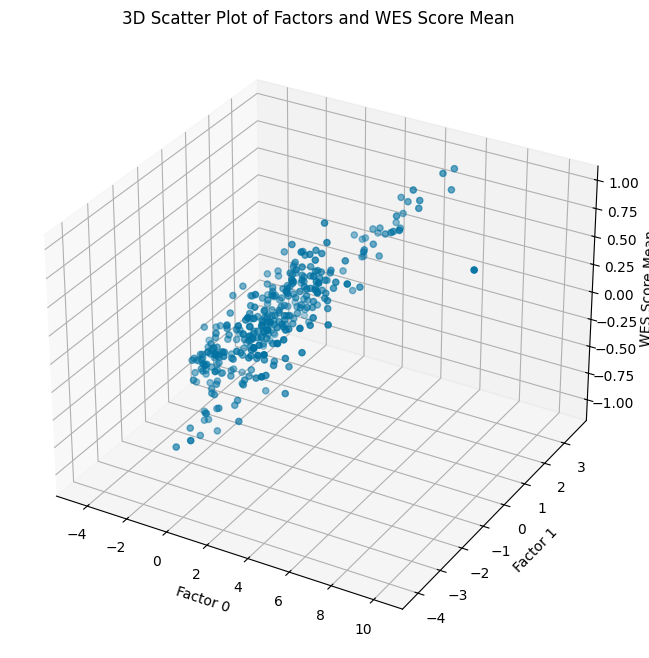

In [141]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Prepare data
x = new_data['factor_0']
y = new_data['factor_1']
z = new_data[y_var]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')  # Customize color and marker

# Set labels
ax.set_xlabel('Factor 0')
ax.set_ylabel('Factor 1')
ax.set_zlabel('WES Score Mean')

# Set title
ax.set_title('3D Scatter Plot of Factors and WES Score Mean')

# Show the plot
plt.show()


In [144]:
import plotly.express as px

# Prepare data
fig = px.scatter_3d(new_data, x='factor_0', y='factor_1', z=y_var, 
                    title='3D Scatter Plot of Factors and WES Score Mean',
                    labels={'factor_0': 'Factor 0', 'factor_1': 'Factor 1', y_var: 'WES Score Mean'})

# Show the plot
fig.show()


## Maps


In [109]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [116]:
#Read shape file

geo_file = r'/Users/fabianjp/Documents/Work/ASIES/Desarrollo local/Data/Mapas/Shapefiles_raw/municipios_gtm/municipios_GTM.shp'
municipios = gpd.read_file(geo_file)
# Merge the shapefile GeoDataFrame with the new_data DataFrame on a common key
merged = municipios.merge(new_data, left_on='Codigo', right_on='cod_mupio')
municipios.head(10)

,OBJECTID,Codigo,Municipio,OID_1,OID_12,Color,Cod_Dep,Departamen,SHAPE_Leng,SHAPE_Area,AreaKm2,MDTAs,geometry
0,1,2000,Belice,1,1,0,23,Belice,0.0,0.0,21700.271606,None,"POLYGON ((721465.215 1820138.647, 721503.320 1..."
1,2,1711,Melchor de Mencos,2,2,0,17,Petén,0.0,0.0,2105.748045,None,"POLYGON ((642145.073 1860256.995, 639242.493 1..."
2,3,1701,Flores,3,3,0,17,Petén,0.0,0.0,3865.325014,None,"POLYGON ((624257.203 1881987.396, 623914.488 1..."
3,4,1702,San José,4,4,0,17,Petén,0.0,0.0,2086.042802,None,"POLYGON ((564453.955 1876460.149, 564365.376 1..."
4,5,1704,San Andrés,5,5,0,17,Petén,0.0,0.0,8051.841963,None,"POLYGON ((564453.955 1876460.149, 564451.609 1..."
5,6,1705,La Libertad,6,6,0,17,Petén,0.0,0.0,6752.846772,None,"POLYGON ((533747.508 1892013.374, 533753.049 1..."
6,7,1703,San Benito,7,7,0,17,Petén,0.0,0.0,544.916464,None,"POLYGON ((562802.162 1873391.368, 563021.024 1..."
7,8,1707,Santa Ana,8,8,0,17,Petén,0.0,0.0,1539.740495,None,"POLYGON ((624562.855 1871594.020, 624492.526 1..."
8,9,1708,Dolores,9,9,0,17,Petén,0.0,0.0,2495.702448,None,"POLYGON ((642145.073 1860256.995, 642106.357 1..."
9,10,1706,San Francisco,10,10,0,17,Petén,0.0,0.0,1902.481586,None,"POLYGON ((564259.940 1869491.859, 566667.595 1..."


/var/folders/9_/cw4fcnqx19j5csppmhlz4mzm0000gn/T/ipykernel_97690/1643254990.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', 10)  # 10 distinct colors for clusters 0 to 5


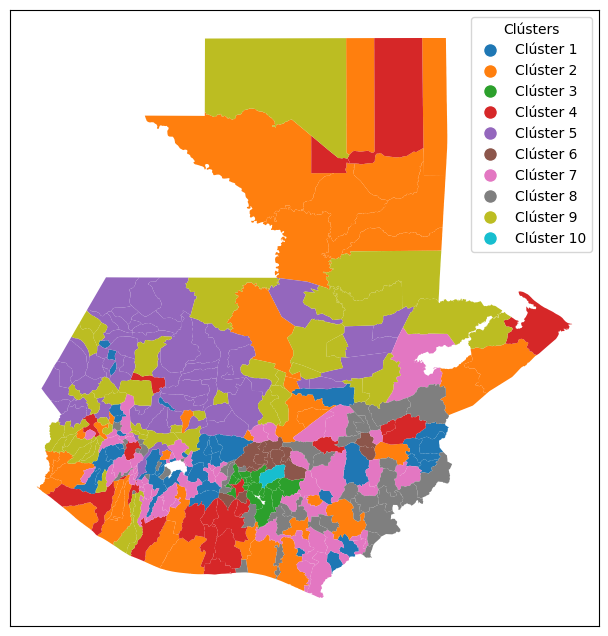

In [128]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os

# Ensure the output folder exists
output_folder = r'/Users/fabianjp/Documents/Work/ASIES/Desarrollo local/Github/R/Desarrollo_local/Data/factors' + r'/' + factor_run
os.makedirs(output_folder, exist_ok=True)

# Define your custom colormap
cmap = cm.get_cmap('tab10', 10)  # 10 distinct colors for clusters 0 to 5

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Store legend entries
legend_labels = []

# Loop through each cluster and plot its respective GeoDataFrame
for i in range(selected_clusters):  # 'selected_clusters' should be defined with the number of clusters
    cluster_data = merged[merged['clusters_num'] == i]
    cluster_data.plot(ax=ax, color=cmap(i), label=f'Cluster {i+1}')  # Use color from the colormap
    legend_labels.append(f'Clúster {i+1}')  # Add cluster label for the legend

# Add title and axis details

# Create a custom legend manually
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10) for i in range(selected_clusters)]
ax.legend(handles, legend_labels, title='Clústers', loc='upper right')
ax.set_xticks([])
ax.set_yticks([])

# Save the plot
plt.savefig(os.path.join(output_folder, f'cluster_{factor_run}_map.png'))

# Display the plot
plt.show()


In [114]:
merged

,OBJECTID,Codigo,Municipio,OID_1,OID_12,Color,Cod_Dep,Departamen,SHAPE_Leng,SHAPE_Area,...,indicador_506_inversion_anual_en_capital_fijo_con_recursos_percibidos_por_transferencias_del_gobierno_central_cod,no_corr,factor_0,factor_1,factor_2,factor_3,factor_4,factor_5,clusters_num,clusters
0,2,1711,Melchor de Mencos,2,2,0,17,Petén,0.0,0.0,...,Bajo,175.0,2.222166,-1.326023,1.517523,0.751043,-2.105976,1.056702,1,1
1,3,1701,Flores,3,3,0,17,Petén,0.0,0.0,...,Bajo,173.0,6.163697,-5.160379,5.560808,-0.656052,0.186172,1.911594,1,1
2,4,1702,San José,4,4,0,17,Petén,0.0,0.0,...,Bajo,180.0,3.163000,-2.290308,0.968056,-0.500964,-0.783670,4.023090,1,1
3,5,1704,San Andrés,5,5,0,17,Petén,0.0,0.0,...,Medio bajo,177.0,-0.510562,0.404258,1.395923,2.546671,-0.223403,2.877975,0,0
4,6,1705,La Libertad,6,6,0,17,Petén,0.0,0.0,...,Bajo,174.0,0.630279,-1.074129,0.442095,2.545665,-0.182189,1.603197,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,333,1330,Santiago Chimaltenango,336,336,0,13,Huehuetenango,0.0,0.0,...,Medio bajo,137.0,-3.931724,0.071305,-2.058308,-2.051632,2.237313,0.239089,0,0
330,334,1306,San Pedro Necta,337,337,0,13,Huehuetenango,0.0,0.0,...,Bajo,128.0,-3.543204,-1.869454,0.818318,-1.661081,-0.325075,-0.957517,0,0
331,335,1315,Todos Santos Cuchumatán,338,338,0,13,Huehuetenango,0.0,0.0,...,Bajo,140.0,-4.188454,-0.392297,-1.481426,-0.084576,0.850429,-0.417055,0,0
332,336,1617,Raxruja,14,14,0,16,Alta Verapaz,0.0,0.0,...,Bajo,NaN,-3.385734,1.636041,1.309758,2.001812,0.440766,2.538399,0,0


In [648]:
new_data.columns

Index(['cod_depto', 'departamento', 'cod_mupio', 'municipio',
       'extorsiones_por_100_000_habitantes',
       'homicidios_por_100_000_habitantes', 'faltas_por_100_000_habitantes',
       'casos_por_conflictividad', 'ranking_gestion_municipal', 'pdm_ot',
       'brecha_de_la_red_vial_', 'distancia_promedio_a_aeropuertos',
       'distancia_promedio_a_puertos', 'tasa_de_electrificacion_',
       'cobertura_de_agua_y_saneamiento', 'deficit_de_vivienda',
       'radiobases_de_telefonia_celular_por_km2', 'usuarios_de_internet',
       'tasa_de_inflacion', 'pobreza', 'gini', 'gasto_en_salud_publica',
       'tasa_de_desnutricion_cronica', 'gasto_en_educacion', 'tasa_neta',
       'alumnos_por_docente', 'capacitacion_tecnica',
       'graduandos_mate_lectura', 'carga_tributaria', 'inversion_publica',
       'afiliacion_al_igss', 'afiliados_por_patrono_particular',
       'peso_del_gobierno_en_la_contratacion', 'salario_minimo',
       'ingreso_medio', 'deportados', 'km2_a_cargo_de_cada_ag